In [143]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tweets/Axisbank tweets.csv
/kaggle/input/twittermask/twitter_mask.png


In [144]:
data_tweets = pd.read_csv('/kaggle/input/tweets/Axisbank tweets.csv')
data_tweets

,Tweet
0,RT @GarimaS38018144: @kimansingh17 @HDFC_Bank ...
1,RT @GarimaS38018144: @kimansingh17 @HDFC_Bank ...
2,RT @GarimaS38018144: @kimansingh17 @HDFC_Bank ...
3,RT @GarimaS38018144: @kimansingh17 @HDFC_Bank ...
4,RT @prashant280294: #AxisBank \n\nSeems big mo...
...,...
1117,#BusinessNews: Equity benchmark #Sensex tumble...
1118,#BusinessNews: Equity benchmark #Sensex jumped...
1119,RT @Ashima_FnO: #AXISBANK \n trend breakout......
1120,#AXISBANK \n trend breakout.... https://t.co/W...


In [145]:
data_tweets.head()

,Tweet
0,RT @GarimaS38018144: @kimansingh17 @HDFC_Bank ...
1,RT @GarimaS38018144: @kimansingh17 @HDFC_Bank ...
2,RT @GarimaS38018144: @kimansingh17 @HDFC_Bank ...
3,RT @GarimaS38018144: @kimansingh17 @HDFC_Bank ...
4,RT @prashant280294: #AxisBank \n\nSeems big mo...


In [146]:
data_tweets.describe

<bound method NDFrame.describe of                                                   Tweet
0     RT @GarimaS38018144: @kimansingh17 @HDFC_Bank ...
1     RT @GarimaS38018144: @kimansingh17 @HDFC_Bank ...
2     RT @GarimaS38018144: @kimansingh17 @HDFC_Bank ...
3     RT @GarimaS38018144: @kimansingh17 @HDFC_Bank ...
4     RT @prashant280294: #AxisBank \n\nSeems big mo...
...                                                 ...
1117  #BusinessNews: Equity benchmark #Sensex tumble...
1118  #BusinessNews: Equity benchmark #Sensex jumped...
1119  RT @Ashima_FnO: #AXISBANK \n trend breakout......
1120  #AXISBANK \n trend breakout.... https://t.co/W...
1121  RT @Ashima_FnO: #AXISBANK \n trend breakout......

[1122 rows x 1 columns]>

In [147]:
data_tweets.tail()

,Tweet
1117,#BusinessNews: Equity benchmark #Sensex tumble...
1118,#BusinessNews: Equity benchmark #Sensex jumped...
1119,RT @Ashima_FnO: #AXISBANK \n trend breakout......
1120,#AXISBANK \n trend breakout.... https://t.co/W...
1121,RT @Ashima_FnO: #AXISBANK \n trend breakout......


In [148]:
data_tweets.dtypes

Tweet    object
dtype: object

In [149]:
data_tweets.isnull()

,Tweet
0,False
1,False
2,False
3,False
4,False
...,...
1117,False
1118,False
1119,False
1120,False


In [150]:
data_tweets.shape

(1122, 1)

In [151]:
data_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1122 entries, 0 to 1121
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Tweet   1122 non-null   object
dtypes: object(1)
memory usage: 8.9+ KB


> > Combining the stopwords from NLTK and sklearn********

In [152]:
import nltk
from nltk.corpus import stopwords

In [153]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [154]:
nltk_stopwords=set(stopwords.words('english'))
print(nltk_stopwords)

{'just', 'by', 'off', "hadn't", 'ourselves', 'which', "aren't", 'hers', 'its', 'not', 'she', 'at', 's', 'both', 'don', 're', "didn't", 'hadn', 'their', 'wasn', 'has', 'and', 'where', 'now', 'been', 'when', 'why', 've', 'y', "shan't", 'what', "isn't", 'being', 'under', 'an', 'ours', 'yours', 'they', 'was', 'some', 'your', "wasn't", 'whom', 'only', "you'd", 'or', "you've", 'against', 'yourselves', "don't", "mightn't", 'on', 'you', 'all', "should've", 'll', "she's", "needn't", 'mustn', 'doesn', 'during', 'didn', 'once', 'other', 'who', 'than', 'there', 'my', 'having', 'few', 'nor', "haven't", 'o', 'herself', 'shouldn', "wouldn't", 'own', 'before', 'how', "doesn't", 'are', "mustn't", 'themselves', 'wouldn', 'down', 'her', 'no', 'we', 'his', 'too', 'the', 'out', 'then', "hasn't", 'aren', 'each', "shouldn't", 'me', 'hasn', 'had', 'shan', 'am', 'doing', 'any', 'haven', 'those', 'he', "won't", 'mightn', 'can', 'won', "you're", 'of', 'over', 'more', 'do', 'ma', 'while', 'into', 'ain', 'weren', 

In [155]:
len(nltk_stopwords)

179

In [156]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
sklearn_stopwords=set(ENGLISH_STOP_WORDS)
print(sklearn_stopwords)

{'amount', 'off', 'somewhere', 'around', 'which', 'hers', 'not', 'one', 'she', 'at', 'else', 'nevertheless', 'several', 're', 'former', 'except', 'nobody', 'their', 'now', 'everywhere', 'twelve', 'thereupon', 'when', 'throughout', 'many', 'what', 'thus', 'being', 'side', 'ever', 'under', 'an', 'perhaps', 'ours', 'they', 'whom', 'only', 'or', 'against', 'six', 'full', 'all', 'hasnt', 'you', 'already', 'anyone', 'forty', 'among', 'other', 'anyway', 'there', 'thereafter', 'my', 'alone', 'eg', 'otherwise', 'anything', 'thereby', 'herself', 'becoming', 'wherein', 'also', 'cry', 'are', 'fifteen', 'fire', 'something', 'either', 'down', 'her', 'anywhere', 'namely', 'his', 'onto', 'well', 'become', 'too', 'the', 'must', 'then', 'due', 'toward', 'almost', 'since', 'least', 'am', 'any', 'done', 'inc', 'those', 'can', 'over', 'meanwhile', 'latterly', 'eleven', 'into', 'much', 'mill', 'nowhere', 'through', 'to', 'again', 'eight', 'someone', 'seems', 'less', 'is', 'anyhow', 'none', 'above', 'hundred

In [157]:
len(sklearn_stopwords)

318

In [158]:
#Find the common stopwords from NLTK and sklearn
print(nltk_stopwords.intersection(sklearn_stopwords))

{'off', 'by', 'ourselves', 'which', 'its', 'hers', 'not', 'she', 'at', 'both', 're', 'their', 'has', 'and', 'where', 'now', 'been', 'when', 'why', 'what', 'being', 'under', 'an', 'ours', 'yours', 'they', 'was', 'some', 'your', 'whom', 'only', 'or', 'against', 'yourselves', 'on', 'you', 'all', 'during', 'once', 'other', 'who', 'than', 'there', 'my', 'few', 'nor', 'herself', 'own', 'before', 'how', 'are', 'themselves', 'down', 'her', 'no', 'we', 'his', 'too', 'the', 'out', 'then', 'each', 'me', 'had', 'am', 'any', 'those', 'he', 'can', 'of', 'over', 'more', 'do', 'while', 'into', 'be', 'to', 'through', 'i', 'again', 'that', 'as', 'is', 'above', 'so', 'if', 'in', 'this', 'about', 'these', 'very', 'were', 'from', 'our', 'but', 'will', 'himself', 'itself', 'have', 'a', 'them', 'should', 'further', 'him', 'between', 'below', 'most', 'up', 'such', 'yourself', 'because', 'it', 'with', 'myself', 'here', 'for', 'until', 'same', 'after'}


In [159]:
len(nltk_stopwords.intersection(sklearn_stopwords))

119

In [160]:
#Combining the stopwords from NLTK and sklearn
combined_stopwords = set(nltk_stopwords).union(sklearn_stopwords)

In [161]:
len(combined_stopwords)

378

**cleaning text in data set**

In [162]:
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()

In [163]:
pip install contractions

Note: you may need to restart the kernel to use updated packages.


In [164]:
import contractions
import re

**define a cleaner function**

In [165]:
# Define a function to clean text using the re library
def clean_text(text):
    # Convert to lowercase
    text = text.lower()

    # Substitute 's=is'
    text = re.sub(r'\bs\b', 'is', text)
    
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    
    # Expand contractions
    text=contractions.fix(text)
    
    # Remove mentions (Twitter handles, for example)
    text = re.sub(r'@\w+', '', text)
    
    # Remove special characters, numbers, and extra whitespaces
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # Remove extra whitespaces
    text = ' '.join(text.split())

    # Remove stopwords
    tokens = text.split()
    tokens = [word for word in tokens if word not in combined_stopwords]
    
    # Join the tokens back into a single string
    text = ' '.join(tokens)
    
    
    return text
    

In [166]:
# Apply the clean_text function to the 'tweets' column
data_tweets['cleaned_tweets'] = data_tweets['Tweet'].apply(clean_text)

In [167]:
# Display the cleaned dataset
print("Cleaned Dataset:")
data_tweets.head()

Cleaned Dataset:


,Tweet,cleaned_tweets
0,RT @GarimaS38018144: @kimansingh17 @HDFC_Bank ...,rt teach bank solve customer issues axisbank
1,RT @GarimaS38018144: @kimansingh17 @HDFC_Bank ...,rt teach bank solve customer issues axisbank
2,RT @GarimaS38018144: @kimansingh17 @HDFC_Bank ...,rt teach bank solve customer issues axisbank
3,RT @GarimaS38018144: @kimansingh17 @HDFC_Bank ...,rt teach bank solve customer issues axisbank
4,RT @prashant280294: #AxisBank \n\nSeems big mo...,rt axisbank big coming looks bullish june seri...


In [168]:
# Display the cleaned dataset
print("\nCleaned Dataset:")
data_tweets.tail()


Cleaned Dataset:


,Tweet,cleaned_tweets
1117,#BusinessNews: Equity benchmark #Sensex tumble...,businessnews equity benchmark sensex tumbled p...
1118,#BusinessNews: Equity benchmark #Sensex jumped...,businessnews equity benchmark sensex jumped po...
1119,RT @Ashima_FnO: #AXISBANK \n trend breakout......,rt axisbank trend breakout
1120,#AXISBANK \n trend breakout.... https://t.co/W...,axisbank trend breakout
1121,RT @Ashima_FnO: #AXISBANK \n trend breakout......,rt axisbank trend breakout


In [169]:
print(data_tweets['cleaned_tweets'][100:105])

100    fraud axisbank axis bank unauthorisely transfe...
101    rt fraud axisbank axis bank unauthorisely tran...
102    axisbank looting hard money innocent people pl...
103    rt axisbank looting hard money innocent people...
104                               r sending message dm n
Name: cleaned_tweets, dtype: object


**data visualization**

In [170]:
import matplotlib.pyplot as plt
from collections import Counter

In [171]:
all_words=[]
for t in data_tweets['Tweet']:
    all_words.extend(t.split())
print(all_words[:50])
len(set(all_words))

['RT', '@GarimaS38018144:', '@kimansingh17', '@HDFC_Bank', '@ICICIBank', 'please', 'teach', 'this', 'bank', '@AxisBankSupport', 'How', 'to', 'solve', 'customer', 'issues..', '#axisbank', '#?', 'RT', '@GarimaS38018144:', '@kimansingh17', '@HDFC_Bank', '@ICICIBank', 'please', 'teach', 'this', 'bank', '@AxisBankSupport', 'How', 'to', 'solve', 'customer', 'issues..', '#axisbank', '#?', 'RT', '@GarimaS38018144:', '@kimansingh17', '@HDFC_Bank', '@ICICIBank', 'please', 'teach', 'this', 'bank', '@AxisBankSupport', 'How', 'to', 'solve', 'customer', 'issues..', '#axisbank']


4311

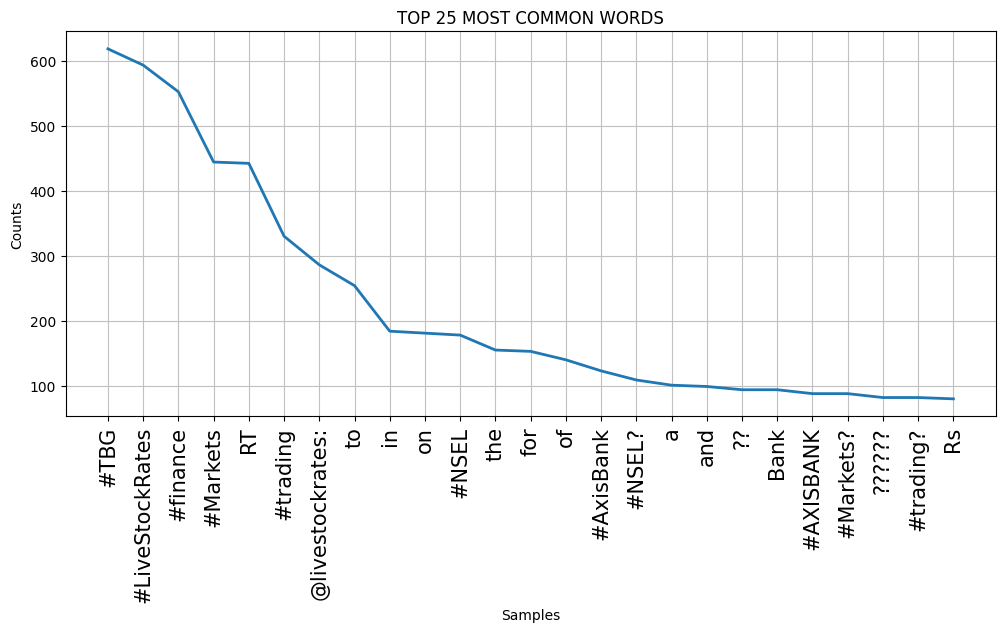

In [172]:
#FREQUENCY DISTRIBUTION
freq_dis=nltk.FreqDist(all_words)
plt.figure(figsize=(12,5))
plt.title('TOP 25 MOST COMMON WORDS')
plt.xticks(fontsize=15)
plt.xlabel('Words')
plt.ylabel('Frequency')
freq_dis.plot(25,cumulative=False)
plt.show()

In [173]:
all_words=[]
for t in data_tweets['cleaned_tweets']:
    all_words.extend(t.split())
print(all_words[:50])
len(set(all_words))

['rt', 'teach', 'bank', 'solve', 'customer', 'issues', 'axisbank', 'rt', 'teach', 'bank', 'solve', 'customer', 'issues', 'axisbank', 'rt', 'teach', 'bank', 'solve', 'customer', 'issues', 'axisbank', 'rt', 'teach', 'bank', 'solve', 'customer', 'issues', 'axisbank', 'rt', 'axisbank', 'big', 'coming', 'looks', 'bullish', 'june', 'series', 'july', 'series', 'rt', 'launch', 'axis', 'bank', 'bcs', 'csc', 'hear', 'launch', 'watch', 'live', 'csc', 'facebook']


2158

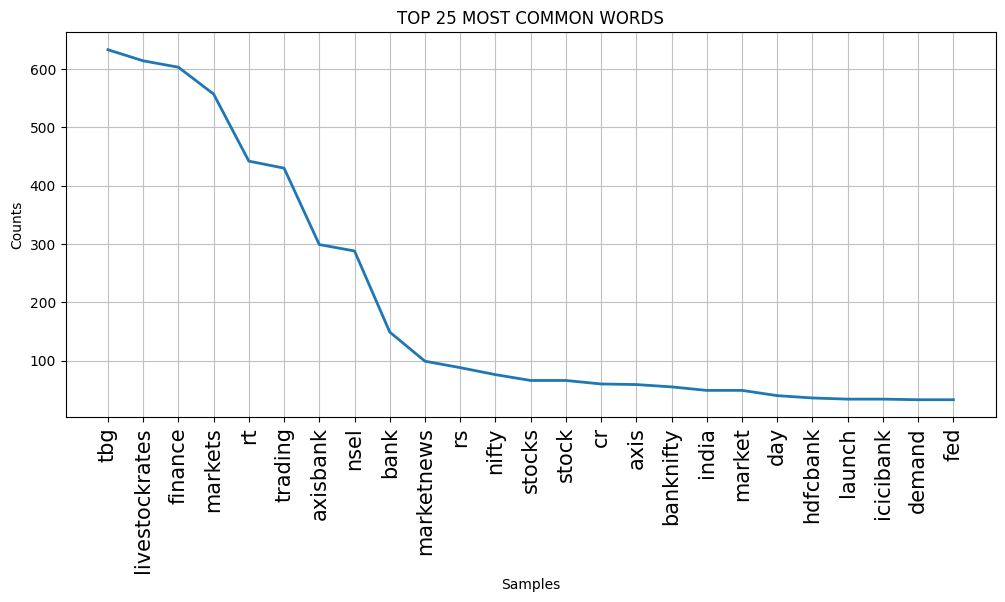

In [174]:
#FREQUENCY DISTRIBUTION
freq_dis=nltk.FreqDist(all_words)
plt.figure(figsize=(12,5))
plt.title('TOP 25 MOST COMMON WORDS')
plt.xticks(fontsize=15)
plt.xlabel('Words')
plt.ylabel('Frequency')
freq_dis.plot(25,cumulative=False)
plt.show()

In [175]:
from wordcloud import WordCloud

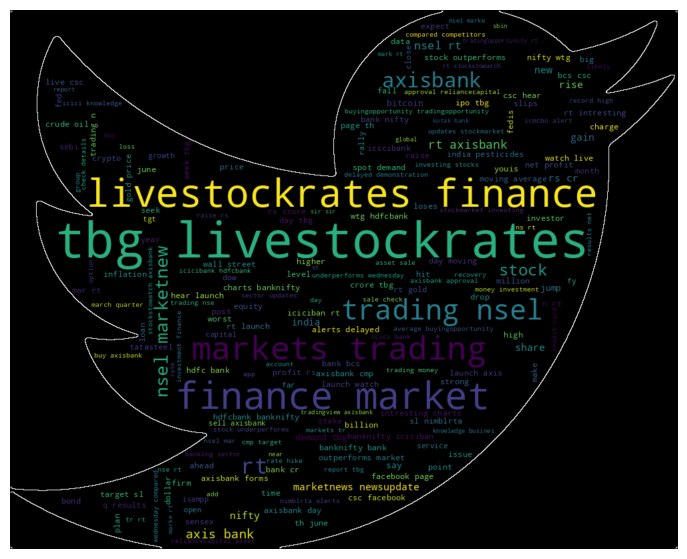

In [176]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np


# Concatenate all cleaned tweets into a single string
all_tweets = ' '.join(data_tweets['cleaned_tweets'])

# Load a cloud-shaped image as a mask
cloud_mask = np.array(Image.open("/kaggle/input/twittermask/twitter_mask.png"))

# Create a WordCloud object with the custom mask
wordcloud = WordCloud(width=1000, height=4000, random_state=21, max_font_size=250,
                      mask=cloud_mask, background_color='black', contour_width=1, contour_color='white',
                      colormap='viridis').generate(all_tweets)

# Display the WordCloud using matplotlib
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

sentimental analysis based on polarity

In [177]:
from textblob import TextBlob

X = data_tweets['cleaned_tweets']

# Function to get sentiment polarity
def get_sentiment(text):
    analysis = TextBlob(text)
    # Assign labels based on sentiment polarity
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity < 0:
        return 'negative'
    else:
        return 'neutral'

# Create a new 'label' column based on sentiment
data_tweets['label'] = X.apply(get_sentiment)

In [178]:
data_tweets.head()

,Tweet,cleaned_tweets,label
0,RT @GarimaS38018144: @kimansingh17 @HDFC_Bank ...,rt teach bank solve customer issues axisbank,neutral
1,RT @GarimaS38018144: @kimansingh17 @HDFC_Bank ...,rt teach bank solve customer issues axisbank,neutral
2,RT @GarimaS38018144: @kimansingh17 @HDFC_Bank ...,rt teach bank solve customer issues axisbank,neutral
3,RT @GarimaS38018144: @kimansingh17 @HDFC_Bank ...,rt teach bank solve customer issues axisbank,neutral
4,RT @prashant280294: #AxisBank \n\nSeems big mo...,rt axisbank big coming looks bullish june seri...,neutral


In [179]:
# Count the occurrences of each label
label_counts = data_tweets['label'].value_counts()

In [180]:
# Display the counts
print("Label Counts:")
print(label_counts)

Label Counts:
label
neutral     712
positive    254
negative    156
Name: count, dtype: int64


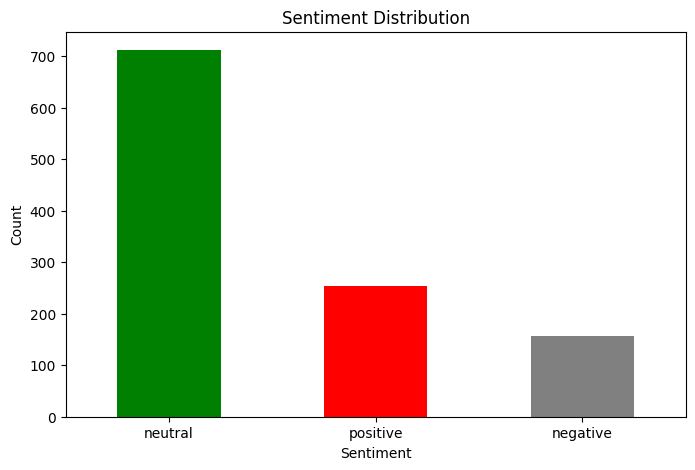

In [181]:
# Plot the counts
plt.figure(figsize=(8, 5))
label_counts.plot(kind='bar', color=['green', 'red', 'gray'])

# Add labels and title
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution')
# Rotate x-axis labels
plt.xticks(rotation=1800)

# Show the plot
plt.show()

In [182]:
tweet_length = len(data_tweets)
tweet_length

1122

In [183]:
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



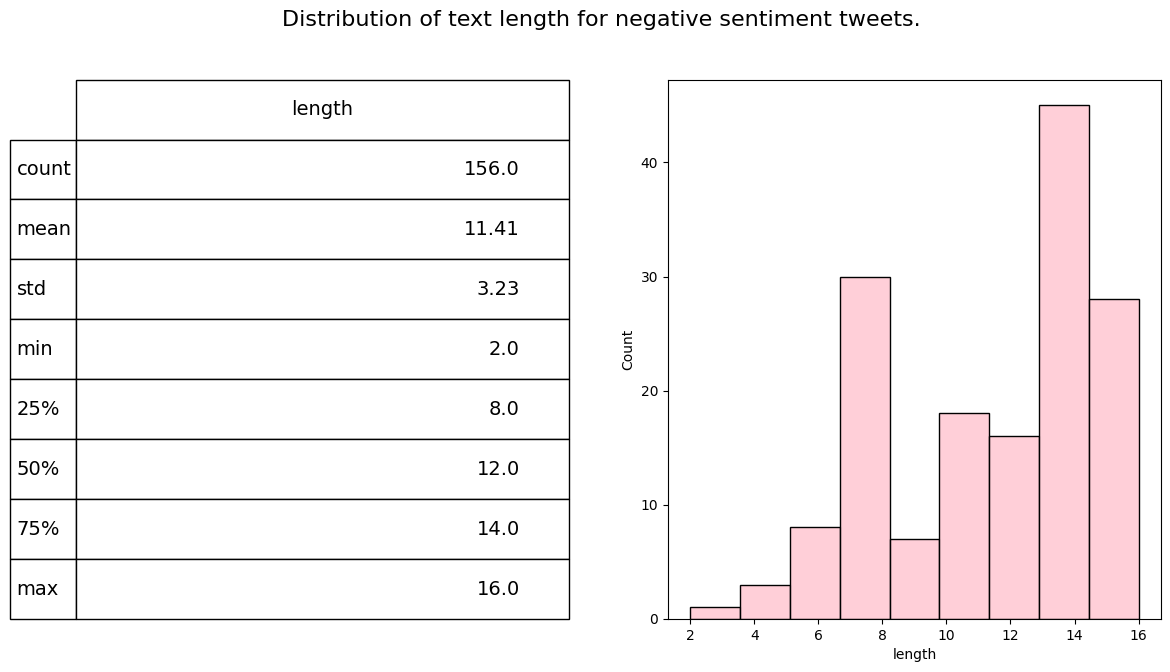

In [184]:
fig = plt.figure(figsize=(14,7))
data_tweets['length'] = data_tweets.cleaned_tweets.str.split().apply(len)
ax1 = fig.add_subplot(122)
sns.histplot(data_tweets[data_tweets['label']=='negative']['length'], ax=ax1,color='pink')
describe = data_tweets.length[data_tweets.label=='negative'].describe().to_frame().round(2)

ax2 = fig.add_subplot(121)
ax2.axis('off')
font_size = 14
bbox = [0, 0, 1, 1]
table = ax2.table(cellText = describe.values, rowLabels = describe.index, bbox=bbox, colLabels=describe.columns)
table.set_fontsize(font_size)
fig.suptitle('Distribution of text length for negative sentiment tweets.', fontsize=16)

plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



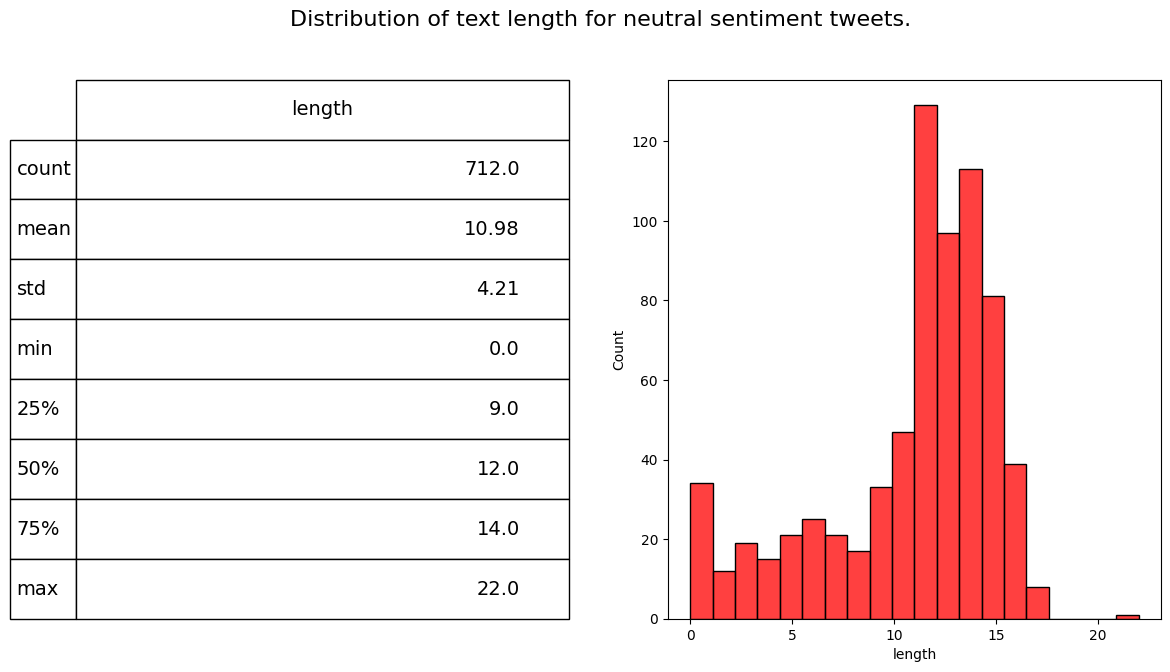

In [185]:
fig = plt.figure(figsize=(14,7))
data_tweets['length'] = data_tweets.cleaned_tweets.str.split().apply(len)
ax1 = fig.add_subplot(122)
sns.histplot(data_tweets[data_tweets['label']=='neutral']['length'], ax=ax1,color='red')
describe = data_tweets.length[data_tweets.label=='neutral'].describe().to_frame().round(2)

ax2 = fig.add_subplot(121)
ax2.axis('off')
font_size = 14
bbox = [0, 0, 1, 1]
table = ax2.table(cellText = describe.values, rowLabels = describe.index, bbox=bbox, colLabels=describe.columns)
table.set_fontsize(font_size)
fig.suptitle('Distribution of text length for neutral sentiment tweets.', fontsize=16)

plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



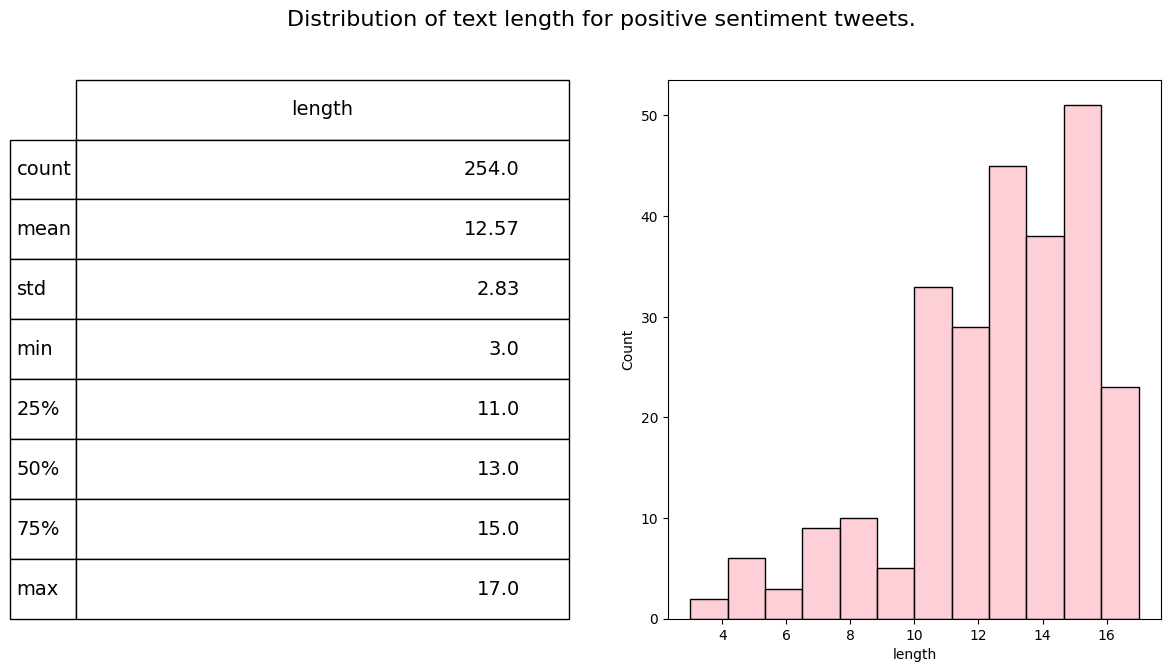

In [186]:
fig = plt.figure(figsize=(14,7))
data_tweets['length'] = data_tweets.cleaned_tweets.str.split().apply(len)
ax1 = fig.add_subplot(122)
sns.histplot(data_tweets[data_tweets['label']=='positive']['length'], ax=ax1,color='pink')
describe = data_tweets.length[data_tweets.label=='positive'].describe().to_frame().round(2)

ax2 = fig.add_subplot(121)
ax2.axis('off')
font_size = 14
bbox = [0, 0, 1, 1]
table = ax2.table(cellText = describe.values, rowLabels = describe.index, bbox=bbox, colLabels=describe.columns)
table.set_fontsize(font_size)
fig.suptitle('Distribution of text length for positive sentiment tweets.', fontsize=16)

plt.show()

In [187]:
import plotly.express as px
fig = px.pie(data_tweets, names='label', title ='Pie chart of different sentiments of tweets')
fig.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



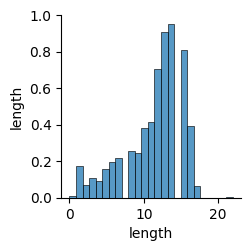

In [188]:
sns.pairplot(data_tweets)

Model selection and model training

In [189]:

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score




In [190]:
X = data_tweets['cleaned_tweets']
y = data_tweets['label']

In [191]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [192]:
# Convert text data to TF-IDF features
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [193]:
# Train an SVM classifier
classifier = SVC(kernel='linear')  
classifier.fit(X_train_tfidf, y_train)

SVC(kernel='linear')

In [194]:
# Predict sentiments on the test set
y_pred = classifier.predict(X_test_tfidf)

In [195]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.89


In [196]:
print("Accuracy: {}%".format(int(round(accuracy*100))))

Accuracy: 89%


In [197]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

In [198]:


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data_tweets['cleaned_tweets'], data_tweets['label'], test_size=0.2, random_state=42)

# Vectorize the tweet text using CountVectorizer
vectorizer = CountVectorizer()
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)

# Train a Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_vect, y_train)

# Predict sentiment on the test set
y_pred = nb_classifier.predict(X_test_vect)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Example of predicting sentiment for a new tweet
new_tweet = ["I love this movie, it's fantastic!"]
new_tweet_vect = vectorizer.transform(new_tweet)
predicted_sentiment = nb_classifier.predict(new_tweet_vect)
print("Predicted sentiment:", predicted_sentiment)

Accuracy: 0.8755555555555555
Predicted sentiment: ['positive']


In [199]:
pip install nltk


Note: you may need to restart the kernel to use updated packages.


In [200]:
import nltk
import random
from nltk.corpus import twitter_samples
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk import FreqDist
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Download NLTK resources
nltk.download('twitter_samples')
nltk.download('stopwords')
nltk.download('punkt')








[nltk_data] Downloading package twitter_samples to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

you can use the following code for input it will not work here as it is showing the error of raw input.

In [201]:
# Load positive, negative, and neutral tweets
positive_tweets = twitter_samples.strings('positive_tweets.json')
negative_tweets = twitter_samples.strings('negative_tweets.json')
neutral_tweets = twitter_samples.strings('tweets.20150430-223406.json')

# Combine tweets with labels
tweets = [(tweet, 'positive') for tweet in positive_tweets] + \
         [(tweet, 'negative') for tweet in negative_tweets] + \
         [(tweet, 'neutral') for tweet in neutral_tweets]

# Shuffle the data
random.shuffle(tweets)

# Preprocess tweets
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def preprocess_tweet(tweet):
    tweet = tweet.lower()  # Convert to lowercase
    tweet_tokens = word_tokenize(tweet)  # Tokenize
    cleaned_tokens = []
    for token in tweet_tokens:
        if token not in stop_words and token.isalpha():  # Remove stopwords and punctuations
            stemmed_token = stemmer.stem(token)  # Stemming
            cleaned_tokens.append(stemmed_token)
    return ' '.join(cleaned_tokens)

# Preprocess all tweets
preprocessed_tweets = [(preprocess_tweet(tweet), label) for (tweet, label) in tweets]

# Split data into training and testing sets
X = [tweet for (tweet, label) in preprocessed_tweets]
y = [label for (tweet, label) in preprocessed_tweets]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the text
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train logistic regression classifier
classifier = LogisticRegression(max_iter=1000)
classifier.fit(X_train_vec, y_train)

# Evaluate the model
y_pred = classifier.predict(X_test_vec)
print(classification_report(y_test, y_pred))

# Now, you can use this classifier to predict the sentiment of new tweets
new_tweet = input("enter the comment:")
preprocessed_new_tweet = preprocess_tweet(new_tweet)
new_tweet_vec = vectorizer.transform([preprocessed_new_tweet])
predicted_sentiment = classifier.predict(new_tweet_vec)
print("Predicted sentiment:", predicted_sentiment[0])

              precision    recall  f1-score   support

    negative       0.73      0.78      0.75      1023
     neutral       0.99      0.99      0.99      3986
    positive       0.75      0.71      0.73       991

    accuracy                           0.91      6000
   macro avg       0.82      0.82      0.82      6000
weighted avg       0.91      0.91      0.91      6000



enter the comment: i hate it


Predicted sentiment: negative
